<a href="https://colab.research.google.com/github/randallgyebi/Data-Science-Projects/blob/master/Machine_Learning_Workshop_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Workshop 4

### Problem Frame & Performance Measure
The challenge is to develop a model that best predicts the labels
A baseline accuracy will be established during data exploration.

## Data Acquisition 
### Create Workspace



In [1]:
import sys;           print("Python version: {}". format(sys.version))
import pandas as pd;  print("Pandas version: {}". format(pd.__version__))
import matplotlib;    print("Matplotlib version: {}". format(matplotlib.__version__))
import numpy as np;   print("NumPy version: {}". format(np.__version__))
import scipy as sp;   print("SciPy version: {}". format(sp.__version__)) 
import IPython;       print("IPython version: {}". format(IPython.__version__)) 
import sklearn;       print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')


Python version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Pandas version: 0.23.4
Matplotlib version: 3.0.3
NumPy version: 1.16.2
SciPy version: 1.2.1
IPython version: 5.5.0
scikit-learn version: 0.20.3



### Load Data
I use Google Colaboratory so I mount and load the data from Google Drive. 



In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/My Drive/Developmental/Programming/Data Science/Projects/Machine Learning Workshop: Meeting 4

/content/drive/My Drive/Developmental/Programming/Data Science/Projects/Machine Learning Workshop: Meeting 4


In [4]:
train_set = pd.read_csv("train.csv", sep="\t")
test_set = pd.read_csv("test.csv", sep="\t")
print ("Data Loaded")

Data Loaded


### Data Check
Quick look at the data structure


In [0]:
pd.set_option('display.max_columns', 500)

In [6]:
train_set.head()


,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,column_37,column_38,column_39,column_40,column_41,column_42,column_43,column_44,column_45,column_46,column_47,column_48,column_49,column_50,column_51,column_52,column_53,column_54,column_55,column_56,column_57,column_58,column_59,column_60,column_61,column_62,column_63,column_64,column_65,column_66,label_target,ids
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.564886,-1.105904,-0.118375,-0.11777,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.016732,-0.021239,-0.01813,-0.030129,2.923985,3.386541,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.917047,-0.447633,-0.576692,-0.970381,-0.701885,2.242255,-0.693559,-0.711349,-0.526373,-0.560564,-0.582820,-0.746607,0.201053,0.701307,2.347136,4.871956,-0.159225,-0.139744,-0.833311,1.171886,3.088793,1.369122,0.917977,2.532508,2.848430,3.808539,1,3850
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.112680,0.861279,-0.118375,-0.11777,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.016732,-0.021239,-0.01813,-0.030129,-0.809412,-0.778683,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.917047,-0.447633,-0.576692,-0.970381,-0.590596,2.242255,-0.693559,-0.562039,-0.661624,-0.560564,-0.582820,-0.746607,-0.387498,-0.576830,-0.649819,-0.551386,-0.159225,-0.139744,-0.154534,-0.367694,-0.782755,-0.687727,-0.657072,-0.763623,-0.267712,-0.220490,0,110407
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.145724,-0.306736,-0.118375,-0.11777,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.016732,-0.021239,-0.01813,-0.030129,-0.062732,-0.183651,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.917047,-0.447633,-0.576692,-0.970381,-0.701885,-1.119800,-0.788587,-0.711349,-0.661624,-0.560564,-0.582820,-0.746607,-0.976050,-0.832457,0.349166,0.282974,-0.159225,-0.139744,-0.833311,-0.752589,-0.567669,-0.687727,-0.657072,-0.543881,-0.267712,-0.220490,0,59641
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.758689,-0.737057,-0.118375,-0.11777,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.016732,-0.021239,-0.01813,-0.030129,-0.809412,-0.183651,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.655655,1.674188,3.482691,2.750306,1.746461,-0.904728,1.682146,2.424162,2.043393,1.968676,1.737764,2.545619,-0.976050,-0.832457,1.348151,1.117335,-0.159225,-0.139744,0.524242,0.017201,-0.137497,-0.173515,-0.132056,-0.104397,-0.267712,-0.220490,1,9554
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.920935,0.062111,-0.118375,-0.11777,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.016732,-0.021239,-0.01813,-0.030129,-0.062732,-0.183651,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.917047,-0.447633,-0.576692,-0.970381,-0.479308,0.578532,-0.598531,-0.562039,-0.661624,-0.560564,-0.582820,-0.746607,-0.387498,-0.321202,-0.649819,-0.551386,-0.159225,-0.139744,-0.833311,-0.752589,-0.567669,-0.687727,-0.657072,-0.543881,-0.267712,-0.220490,0,29360


No columns are labelled and the ids seem abitrary.

In [7]:
train_set.describe()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,column_37,column_38,column_39,column_40,column_41,column_42,column_43,column_44,column_45,column_46,column_47,column_48,column_49,column_50,column_51,column_52,column_53,column_54,column_55,column_56,column_57,column_58,column_59,column_60,column_61,column_62,column_63,column_64,column_65,column_66,label_target,ids
count,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000,39134.000000
mean,0.149870,0.278965,0.179869,0.165483,0.076404,0.043415,0.042572,0.063423,0.000886,-0.006658,-0.000030,0.004178,0.739229,0.260771,0.050825,0.687714,0.024787,0.055732,0.065033,0.015715,0.100194,0.601395,0.350718,0.047887,0.000920,0.001931,-0.000996,-0.000717,0.003838,0.005742,0.234681,0.347371,0.057878,0.063423,0.048500,0.248147,0.478382,0.054173,0.374150,0.093295,-0.001331,0.004448,0.008357,0.005342,0.009566,-0.007520,0.007788,0.005617,0.005416,0.006074,0.006108,0.011171,-0.002340,0.003162,0.010521,0.008589,-0.008245,-0.004898,-0.000043,0.003560,0.006629,0.002611,0.003485,0.006811,-0.004861,-0.000235,0.240047,55920.811392
std,0.356948,0.448496,0.384083,0.371620,0.265647,0.203792,0.201892,0.243726,0.986925,1.000664,0.953633,1.020556,0.439061,0.439061,0.219644,0.463432,0.155476,0.229406,0.246587,0.124373,0.300263,0.489617,0.477201,0.213529,1.126909,1.165015,0.859711,0.946819,1.011981,1.010416,0.423805,0.476141,0.233516,0.243726,0.214823,0.431943,0.499539,0.226361,0.483909,0.290849,0.997650,0.994994,1.003150,0.999494,1.015672,0.995280,1.008705,1.007588,0.996887,1.000196,1.003881,1.007053,1.006517,1.012511,1.011189,1.012900,0.960210,0.986456,0.994014,1.007605,1.015231,1.005949,1.005340,1.014498,0.983553,1.010891,0.427117,32129.813119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.567514,-1.597699,-0.118375,-0.117770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016732,-0.021239,-0.018130,-0.030129,-0.809412,-0.778683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.917047,-0.447633,-0.576692,-0.970381,-0.701885,-1.119800,-0.788587,-0.711349,-0.661624,-0.560564,-0.582820,-0.746607,-0.976050,-0.832457,-0.649819,-0.551386,-0.159225,-0.139744,-0.833311,-0.752589,-0.782755,-0.687727,-1.182088,-0.983365,-0.267712,-0.220490,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.629487,-0.798531,-0.118375,-0.117770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016732,-0.021239,-0.018130,-0.030129,-0.809412,-0.778683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.917047,-0.447633,-0.576692,-0.970381,-0.590596,-0.721792,-0.598531,-0.562039,-0.526373,-0.560564,-0.582820,-0.746607,-0.387498,-0.576830,-0.649819,-0.551386,-0

## Data Exploration & Visualisation
### Data Visualisation
Since the data is already cleaned, we will just do some exploration and visualise the data to gain insights




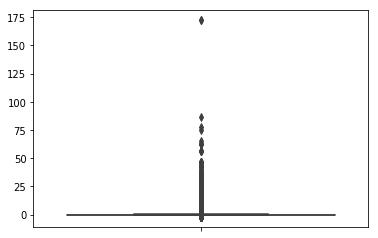

In [8]:
import seaborn as sns


sns.boxplot(y = train_set.drop(["label_target", "ids"], 1), data = train_set)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb84f32320>,
      dtype=object)

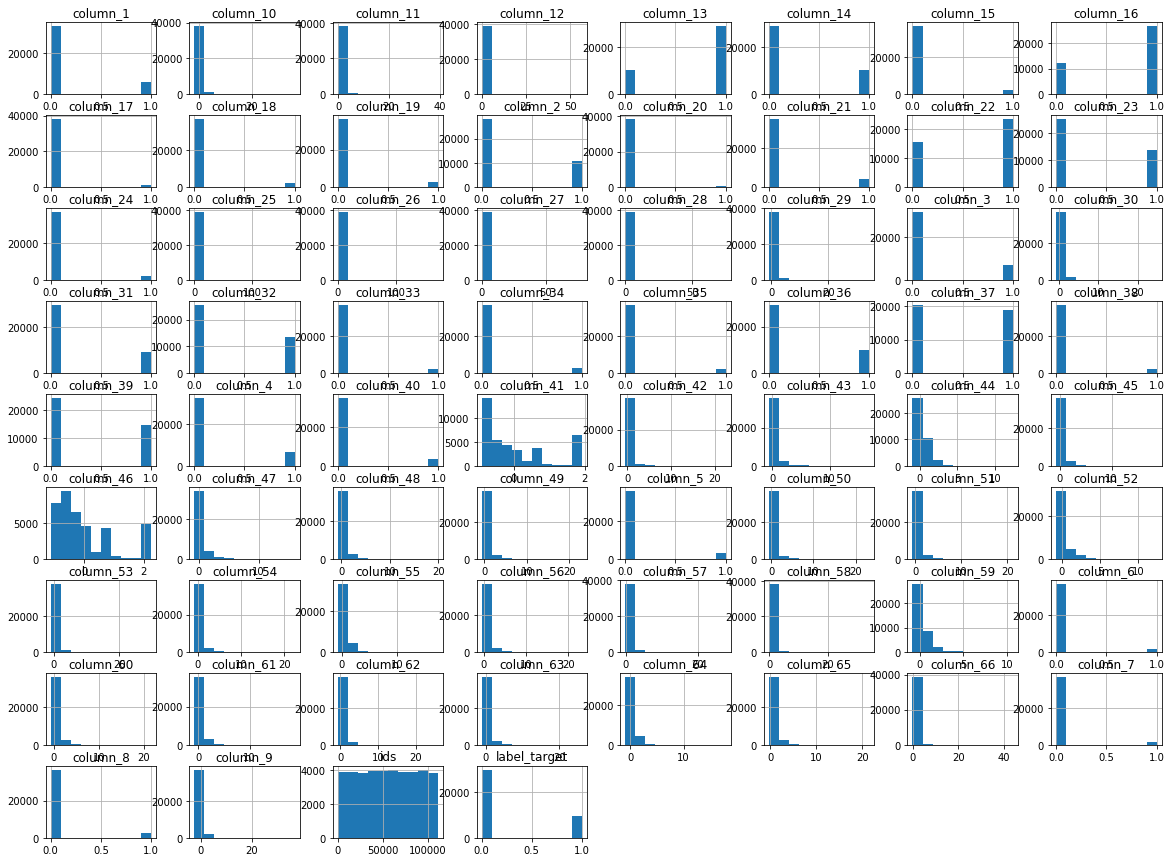

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
train_set.hist(bins=10, figsize=(20,15))  

### Data Exploration
looking for correlations
Experimenting with attribute combinations

In [10]:
corr_matrix = train_set.corr()
corr_matrix['label_target'].sort_values(ascending=False)

label_target    1.000000
column_62       0.240209
column_63       0.239637
column_53       0.207995
column_61       0.199575
column_64       0.199023
column_59       0.186825
column_54       0.176349
column_60       0.169644
column_30       0.143274
column_29       0.142297
column_55       0.109316
column_56       0.097422
column_52       0.049634
column_47       0.048261
column_48       0.045378
column_45       0.045256
column_49       0.042639
column_43       0.041475
column_50       0.039592
column_51       0.038540
column_65       0.034992
column_42       0.031675
column_66       0.030791
column_6        0.030285
column_44       0.029865
column_57       0.020682
column_39       0.019440
column_35       0.019047
column_12       0.018346
                  ...   
column_28       0.008559
column_40       0.007115
column_36       0.007051
column_31       0.006834
column_26       0.006561
column_27       0.006162
column_17       0.005832
column_24       0.005646
column_25       0.004949


There doesnt seem to be any moderate correlation with any columns however Columns 9, 10, 61 and a few others show some signs of weak correlation.

## Data Manipulation
The only data wrangling needed will be for feature scaling and feature creation but first the raw data will be used to assess the current accuracy.

## Model Selection
### Model Exploration
Training and evaluating a selection of models on the training set
Use Cross validation
Shortlist 3-5 algorithms



In [11]:
X_train = np.array(train_set.drop(columns=["label_target", "ids"]))
y_train = np.array(train_set["label_target"])

X_test = np.array(test_set.drop(columns=["label_target", "ids"]))
y_test = np.array(test_set["label_target"])

X_train.shape, y_train.shape

((39134, 66), (39134,))

In [0]:
from sklearn import model_selection, neighbors, ensemble, linear_model, svm,  tree


knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_scores = model_selection.cross_val_score(knn, X_train, y_train)

randfor = ensemble.RandomForestClassifier()
randfor.fit(X_train, y_train)
randfor_scores = model_selection.cross_val_score(randfor, X_train, y_train)

log_reg = linear_model.LogisticRegressionCV()
log_reg.fit(X_train, y_train)
log_reg_scores = model_selection.cross_val_score(log_reg, X_train, y_train)

svm = svm.LinearSVC()
svm.fit(X_train, y_train)
svm_scores = model_selection.cross_val_score(svm, X_train, y_train)

dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_scores = model_selection.cross_val_score(dec_tree, X_train, y_train)


In [13]:
print(" Cross validation for knn_scores:", np.mean(knn_scores))
print(" Cross validation for randfor_scores:", np.mean(randfor_scores))
print(" Cross validation for log_reg_scores:", np.mean(log_reg_scores))
print(" Cross validation for svm_scores:", np.mean(svm_scores)) 
print(" Cross validation for dec_tree_scores:", np.mean(dec_tree_scores)) 



 Cross validation for knn_scores: 0.7279602394182803
 Cross validation for randfor_scores: 0.7475341422747608
 Cross validation for log_reg_scores: 0.765830326297739
 Cross validation for svm_scores: 0.7659580872117969
 Cross validation for dec_tree_scores: 0.6468798145888736


In [0]:
knn_acc = knn.score(X_test, y_test)
randfor_acc = randfor.score(X_test, y_test)
log_reg_acc = log_reg.score(X_test, y_test)
svm_acc = svm.score(X_test, y_test)
dec_tree_acc = dec_tree.score(X_test, y_test)





### Model Evaluation

In [15]:
print(" Accuracy for knn:", np.mean(knn_acc))
print(" Accuracy for randfor:", np.mean(randfor_acc))
print(" Accuracy for log_reg:", np.mean(log_reg_acc))
print(" Accuracy for svm:", np.mean(svm_acc)) 
print(" Accuracy for dec_tree:", np.mean(dec_tree_acc)) 

 Accuracy for knn: 0.7280262373285629
 Accuracy for randfor: 0.7516994633273703
 Accuracy for log_reg: 0.7671437090041742
 Accuracy for svm: 0.7680977936791891
 Accuracy for dec_tree: 0.6456768038163387


## Secondary Data Manipulation
Now that the raw data has been used, I will make some rudimentary changes to the data to try and improve the model accuracies if possible.



In [0]:
from scipy import stats

train_cleaner = train_set[(np.abs(stats.zscore(train_set.drop(['label_target', 'ids'],1))) < 3).all(axis=1)]

In [17]:
train_cleaner.shape, train_set.shape

((18521, 68), (39134, 68))

It seems we lost almost half of our rows with this clean up but as seen below the data has a much better spread now.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb842ba668>,
      dtype=object)

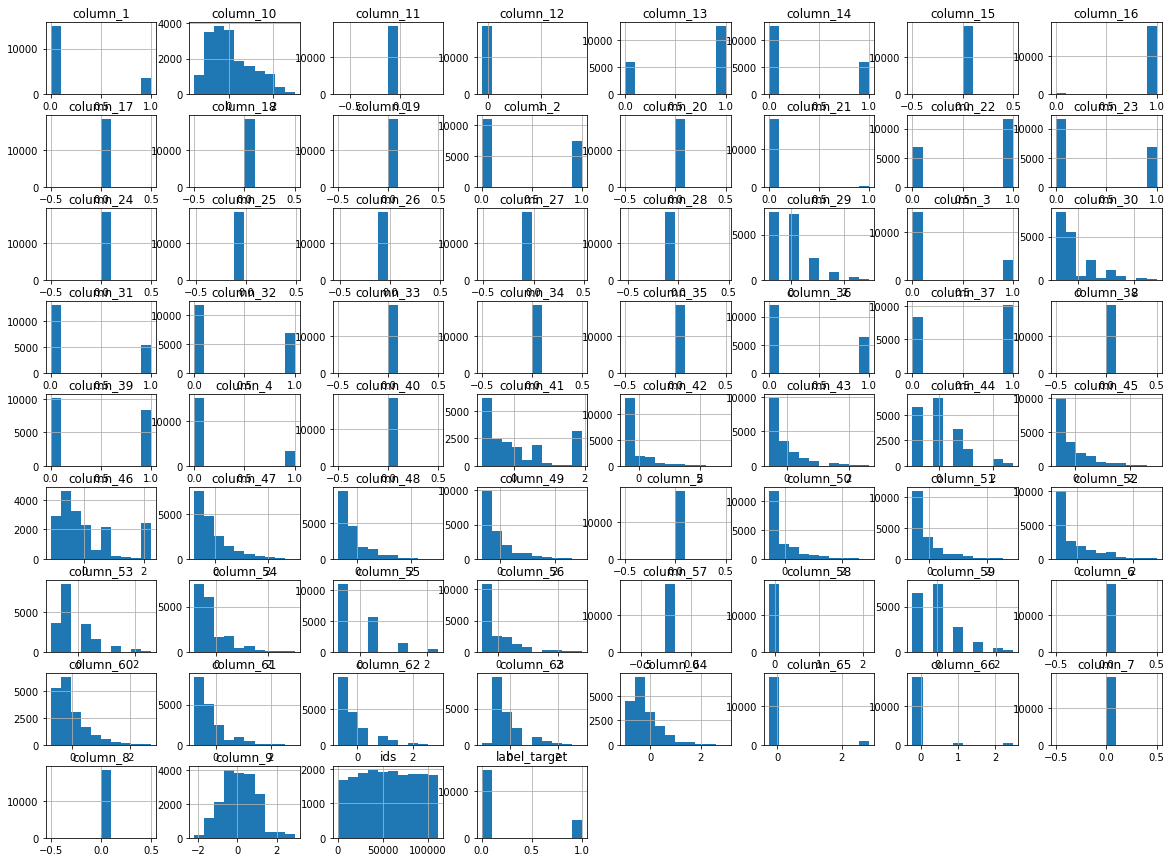

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
train_cleaner.hist(bins=10, figsize=(20,15))  

In [19]:
corr_matrix = train_cleaner.corr()
corr_matrix['label_target'].sort_values(ascending=False)

label_target    1.000000e+00
column_63       1.696105e-01
column_62       1.691914e-01
column_53       1.416684e-01
column_61       1.312127e-01
column_64       1.311631e-01
column_59       1.215058e-01
column_60       1.082657e-01
column_54       1.081424e-01
column_29       8.151862e-02
column_30       8.038052e-02
column_55       5.477589e-02
column_56       5.302130e-02
column_47       3.355840e-02
column_48       3.214899e-02
column_45       3.041848e-02
column_52       2.958987e-02
column_42       2.706500e-02
column_49       2.704491e-02
column_1        2.684850e-02
column_39       2.637042e-02
column_50       2.546028e-02
column_51       2.274626e-02
column_43       2.233988e-02
column_22       2.062265e-02
column_36       1.571289e-02
column_44       1.522948e-02
column_31       1.361663e-02
column_58       1.129794e-02
column_21       9.571373e-03
                    ...     
column_28      -8.543597e-16
column_27      -1.463419e-15
column_66      -3.053975e-04
column_3      

In [20]:
train_cleaner.describe()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,column_37,column_38,column_39,column_40,column_41,column_42,column_43,column_44,column_45,column_46,column_47,column_48,column_49,column_50,column_51,column_52,column_53,column_54,column_55,column_56,column_57,column_58,column_59,column_60,column_61,column_62,column_63,column_64,column_65,column_66,label_target,ids
count,18521.000000,18521.000000,18521.000000,18521.000000,18521.0,18521.0,18521.0,18521.0,18521.000000,18521.000000,1.852100e+04,18521.000000,18521.000000,18521.000000,18521.0,18521.000000,18521.0,18521.0,18521.0,18521.0,18521.000000,18521.000000,18521.000000,18521.0,1.852100e+04,1.852100e+04,1.852100e+04,1.852100e+04,18521.000000,18521.000000,18521.000000,18521.000000,18521.0,18521.0,18521.0,18521.000000,18521.000000,18521.0,18521.000000,18521.0,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,1.852100e+04,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000
mean,0.190109,0.403596,0.225582,0.180714,0.0,0.0,0.0,0.0,0.095044,0.084323,-1.183750e-01,-0.117260,0.682685,0.317315,0.0,0.981426,0.0,0.0,0.0,0.0,0.018574,0.631607,0.368393,0.0,-1.673244e-02,-2.123914e-02,-1.812958e-02,-3.012909e-02,-0.142597,-0.157098,0.287026,0.367313,0.0,0.0,0.0,0.345662,0.550888,0.0,0.449112,0.0,0.039562,-0.137829,-0.135137,-0.066174,-0.129597,0.050065,-0.149295,-0.149330,-0.137460,-0.143508,-0.146649,-0.135626,-0.162895,-0.166123,-0.117505,-0.136436,-1.592246e-01,-0.137272,-0.139985,-0.170290,-0.223015,-0.217493,-0.203490,-0.207570,-0.110231,-0.123903,0.210032,56327.830949
std,0.392397,0.490631,0.417976,0.384791,0.0,0.0,0.0,0.0,0.877674,0.932625,5.691434e-14,0.031039,0.465444,0.465444,0.0,0.135017,0.0,0.0,0.0,0.0,0.135017,0.482382,0.482382,0.0,1.936004e-15,6.758665e-15,3.705469e-15,1.031841e-14,0.731015,0.688273,0.452386,0.482086,0.0,0.0,0.0,0.475596,0.497417,0.0,0.497417,0.0,1.004555,0.493327,0.652025,0.856462,0.625678,0.997566,0.616515,0.600013,0.619379,0.567790,0.568882,0.698414,0.688641,0.654586,0.737815,0.642256,3.153119e-14,0.075194,0.706161,0.614466,0.588346,0.626740,0.637748,0.601479,0.682612,0.444441,0.407342,31745.910120
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-2.179909,-1.536225,-1.183750e-01,-0.117770,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,-1.673244e-02,-2.123914e-02,-1.812958e-02,-3.012909e-02,-0.809412,-0.778683,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,-0.917047,-0.447633,-0.576692,-0.970381,-0.701885,-1.119800,-0.788587,-0.711349,-0.661624,-0.560564,-0.582820,-0.746607,-0.976050,-0.832457,-0.649819,-0.551386,-1.592246e-01,-0.139744,-0.833311,-0.752589,-0.782755,-0.687727,-1.182088,-0.983365,-0.267712,-0.220490,0.000000,5.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.500285,-0.614108,-1.183750e-01,-0.117770,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,-1.673244e-02,-2.123914e-02,-1.812958e-02,-3.012909e-02,-0.809412,-0.778683,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,-0.917047,-0.447633,-0.576692,-0.970381,-0.590596,-0.672350,-0.598531,-0.562039,-0.526373,-0.560564,-0.582820,-0.746607,-0.387498,-0.576830,-0.649819,-0.551386,-1.592246e-01,-0.139744,-0.833311,-0.752589,-0.567669,-0.687727,-0.657072,-0.543881,-0.267712,-0.220490,0.000000,29485.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.016522,-0.122312,-1.183750e-01,-0.117770,1.000000,0.000000,0.0,1.000000,0.0,0.0,0

Many of the continuous columns still show a right skew and values greater than 1 so logarithms and standardisation may normalise this.

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_cleaning = pd.DataFrame(scaler.fit_transform(train_cleaner.drop(['label_target', 'ids'], 1)))

In [22]:
train_cleaning.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405063,0.534247,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.030303,1.000000,0.025,0.04,0.000000,0.00,0.000000,0.000000,0.166667,0.066667,0.000000,0.000,0.0,0.0,0.2,0.111111,0.000000,0.000000,0.125,0.055556,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.607595,0.356164,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.060606,0.505147,0.050,0.04,0.000000,0.00,0.000000,0.000000,0.166667,0.133333,0.000000,0.000,0.0,0.0,0.0,0.000000,0.058824,0.000000,0.125,0.111111,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354430,0.342466,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.209941,0.071429,0.125,0.2,0.212121,0.133824,0.200,0.24,0.185185,0.20,0.185185,0.166667,0.000000,0.000000,1.000000,0.500,0.0,0.0,0.4,0.333333,0.176471,0.285714,0.375,0.222222,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367089,0.136986,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.2,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.217359,0.285714,0.250,0.6,0.454545,0.125000,0.375,0.48,0.481481,0.32,0.296296,0.416667,0.166667,0.266667,0.333333,0.250,0.0,0.0,0.2,0.222222,0.294118,0.142857,0.250,0.333333,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.455696,0.178082,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.333333,0.375,0.0,0.0,0.0,0.111111,0.117647,0.000000,0.125,0.166667,0.0,0.0


In [23]:
train_cleaning.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
count,18521.000000,18521.000000,18521.000000,18521.000000,18521.0,18521.0,18521.0,18521.0,18521.000000,18521.000000,18521.0,18521.000000,18521.000000,18521.000000,18521.0,18521.000000,18521.0,18521.0,18521.0,18521.0,18521.000000,18521.000000,18521.000000,18521.0,18521.0,18521.0,18521.0,18521.0,18521.000000,18521.000000,18521.000000,18521.000000,18521.0,18521.0,18521.0,18521.000000,18521.000000,18521.0,18521.000000,18521.0,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.0,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000,18521.000000
mean,0.190109,0.403596,0.225582,0.180714,0.0,0.0,0.0,0.0,0.445766,0.361114,0.0,0.000270,0.682685,0.317315,0.0,0.981426,0.0,0.0,0.0,0.0,0.018574,0.631607,0.368393,0.0,0.0,0.0,0.0,0.0,0.178608,0.174104,0.287026,0.367313,0.0,0.0,0.0,0.345662,0.550888,0.0,0.449112,0.0,0.336646,0.093863,0.135967,0.243021,0.155830,0.347961,0.168185,0.150564,0.143537,0.118724,0.125305,0.170118,0.230270,0.173778,0.177618,0.124332,0.0,0.001080,0.204287,0.168097,0.153082,0.130639,0.232992,0.196138,0.050537,0.035959
std,0.392397,0.490631,0.417976,0.384791,0.0,0.0,0.0,0.0,0.171976,0.207821,0.0,0.016429,0.465444,0.465444,0.0,0.135017,0.0,0.0,0.0,0.0,0.135017,0.482382,0.482382,0.0,0.0,0.0,0.0,0.0,0.195804,0.192783,0.452386,0.482086,0.0,0.0,0.0,0.475596,0.497417,0.0,0.497417,0.0,0.353518,0.149465,0.200777,0.230189,0.170368,0.296713,0.162193,0.160743,0.169610,0.161633,0.163431,0.194462,0.195010,0.170714,0.246188,0.192440,0.0,0.032844,0.208069,0.177384,0.160906,0.174119,0.151840,0.152067,0.219057,0.165465
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.329114,0.205479,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.030303,0.133088,0.050000,0.040000,0.037037,0.000000,0.000000,0.000000,0.166667,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.058824,0.000000,0.125000,0.111111,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.430380,0.315068,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.200000,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.224036,0.000000,0.000000,0.200000,0.090909,0.252941,0.100000,0.080000,0.074074,0.040000,0.074074,0.083333,0.166667,0.133333,0.000000,0.000000,0.0,0.000000,0.200000,0.111111,0.117647,0.000000,0.125000,0.166667,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.569620,0.493151,0.0,0.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.200000,0.250000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.517804,0.142857,0.250000,0.400000,0.212121,0.502941,0.250000,0.200000,0.185185,0.160000,0.185185,0.250000,0.333333,0.266667,0.333333,0.250000,0.0,0.000000,0.200000,0.222222,0.235294,0.142857,0.250000,0.277778,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.0000

In [0]:
X2_train = np.array(train_cleaning)
y2_train = np.array(train_cleaner["label_target"])



In [25]:
X2_train.shape, y2_train.shape

((18521, 66), (18521,))

In [0]:
from sklearn import model_selection, neighbors, ensemble, linear_model, svm,  tree


knn2 = neighbors.KNeighborsClassifier()
knn2.fit(X2_train, y2_train)
knn2_scores = model_selection.cross_val_score(knn2, X2_train, y2_train)

randfor2 = ensemble.RandomForestClassifier()
randfor2.fit(X_train, y_train)
randfor2_scores = model_selection.cross_val_score(randfor2, X2_train, y2_train)

log_reg2 = linear_model.LogisticRegressionCV()
log_reg2.fit(X_train, y_train)
log_reg2_scores = model_selection.cross_val_score(log_reg2, X2_train, y2_train)

svm2 = svm.LinearSVC()
svm2.fit(X_train, y_train)
svm2_scores = model_selection.cross_val_score(svm2, X2_train, y2_train)

dec_tree2 = tree.DecisionTreeClassifier()
dec_tree2.fit(X_train, y_train)
dec_tree2_scores = model_selection.cross_val_score(dec_tree2, X2_train, y2_train)


In [27]:
print(" Cross validation for knn2_scores:", np.mean(knn2_scores))
print(" Cross validation for randfor2_scores:", np.mean(randfor2_scores))
print(" Cross validation for log_reg2_scores:", np.mean(log_reg2_scores))
print(" Cross validation for svm2_scores:", np.mean(svm2_scores)) 
print(" Cross validation for dec_tree2_scores:", np.mean(dec_tree2_scores)) 



 Cross validation for knn2_scores: 0.75654690120914
 Cross validation for randfor2_scores: 0.7732305519823247
 Cross validation for log_reg2_scores: 0.7893742605257862
 Cross validation for svm2_scores: 0.7901301621551425
 Cross validation for dec_tree2_scores: 0.6620595911153541


In [28]:
print(" Cross validation change for knn:", (np.mean(knn2_scores)-np.mean(knn_scores)) )
print(" Cross validation change for randfor:", (np.mean(randfor2_scores)-np.mean(randfor_scores)) )
print(" Cross validation change for log_reg:", (np.mean(log_reg2_scores)-np.mean(log_reg_scores)) )
print(" Cross validation change for svm:", (np.mean(svm2_scores)-np.mean(svm_scores)) ) 
print(" Cross validation change for dec_tree:", (np.mean(dec_tree2_scores)-np.mean(dec_tree_scores)) ) 



 Cross validation change for knn: 0.02858666179085978
 Cross validation change for randfor: 0.025696409707563928
 Cross validation change for log_reg: 0.023543934228047236
 Cross validation change for svm: 0.02417207494334561
 Cross validation change for dec_tree: 0.015179776526480504


### Model Evaluation

In [0]:
X_test2 = pd.DataFrame(scaler.fit_transform(X_test))

knn2_acc = knn2.score(X_test, y_test)
randfor2_acc = randfor2.score(X_test, y_test)
log_reg2_acc = log_reg2.score(X_test, y_test)
svm2_acc = svm2.score(X_test, y_test)
dec_tree2_acc = dec_tree2.score(X_test, y_test)

In [30]:
print(" Accuracy for knn2:", np.mean(knn2_acc))
print(" Accuracy for randfor2:", np.mean(randfor2_acc))
print(" Accuracy for log_reg2:", np.mean(log_reg2_acc))
print(" Accuracy for svm2:", np.mean(svm2_acc)) 
print(" Accuracy for dec_tree2:", np.mean(dec_tree2_acc)) 

 Accuracy for knn2: 0.7227787716159809
 Accuracy for randfor2: 0.7506261180679785
 Accuracy for log_reg2: 0.7671437090041742
 Accuracy for svm2: 0.7680381633870006
 Accuracy for dec_tree2: 0.6472868217054264


Although there has been an improvement in cross validation, the overall accuracy of the model does not seem to have changed.

### To be completed

Model Optimisation

Grid Search

Randomised Search 

Ensemble Methods

Best Models & Errors 

